data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_ori = pd.read_csv("bank-additional/bank-additional-full.csv",  sep=';')
df_ori.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df=pd.read_csv('bank_additional_full_clean_normalized.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.642226,0,2,1,0,0,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
1,-0.196449,1,2,4,0,1,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
2,0.093868,2,2,2,0,0,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
3,1.642226,1,2,4,0,0,1,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
4,1.932543,2,2,5,0,0,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0


In [4]:
X = df.iloc[:, 0:-1]
y = df.y

In [5]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.642226,0,2,1,0,0,0,0,5,1,0.005792,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
1,-0.196449,1,2,4,0,1,0,0,5,1,-0.127941,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
2,0.093868,2,2,2,0,0,0,0,5,1,-0.414513,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
3,1.642226,1,2,4,0,0,1,0,5,1,0.181556,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
4,1.932543,2,2,5,0,0,0,0,5,1,-0.460365,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641


In [6]:
X.pdays.max(), X.pdays.min()

(0.2118836362185938, -4.749052297919588)

In [7]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=101)

In [10]:
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [11]:
from sklearn.metrics import classification_report

In [12]:
df_ori.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
categorical_columns_subset = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'
]

numerical_columns_subset = [
    'duration', 'campaign', 'pdays',
    'previous', 'emp.var.rate', 'cons.price.idx', 
    'cons.conf.idx', 'euribor3m', 'nr.employed'
]

X = X[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

n_categorical_features = X.select_dtypes(include="category").shape[1]
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

Number of samples: 30488
Number of features: 19
Number of categorical features: 10
Number of numerical features: 9


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)



In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf_rf1 = make_pipeline(
    one_hot_encoder, RandomForestClassifier(n_estimators=10, min_samples_leaf=1, class_weight='balanced')
)
clf_rf1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7aa36e0250>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=10))])

In [18]:
clf_rf2 = make_pipeline(
    one_hot_encoder, RandomForestClassifier(n_estimators=20, min_samples_leaf=1, class_weight='balanced')
)
clf_rf2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7aa36e0250>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=20))])

In [19]:
clf_rf3 = make_pipeline(
    one_hot_encoder, RandomForestClassifier(n_estimators=30, min_samples_leaf=1, class_weight='balanced')
)
clf_rf3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7aa36e0250>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=30))])

In [20]:
clf_rf4 = make_pipeline(
    one_hot_encoder, RandomForestClassifier(n_estimators=10, min_samples_leaf=3, class_weight='balanced')
)
clf_rf4.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7aa36e0250>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=3, n_estimators=10))])

In [21]:
clf_rf5 = make_pipeline(
    one_hot_encoder, RandomForestClassifier(n_estimators=10, min_samples_leaf=6, class_weight='balanced')
)
clf_rf5.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7aa36e0250>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=6, n_estimators=10))])

In [22]:
clf_rf6 = make_pipeline(
    one_hot_encoder, RandomForestClassifier(n_estimators=20, min_samples_leaf=3, class_weight='balanced')
)
clf_rf6.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7aa36e0250>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=3, n_estimators=20))])

In [23]:
clf_rf7 = make_pipeline(
    one_hot_encoder, RandomForestClassifier(n_estimators=20, min_samples_leaf=6, class_weight='balanced')
)
clf_rf7.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7aa36e0250>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=6, n_estimators=20))])

In [24]:
clf_rf8 = make_pipeline(
    one_hot_encoder, RandomForestClassifier(n_estimators=30, min_samples_leaf=3, class_weight='balanced')
)
clf_rf8.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7aa36e0250>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=3, n_estimators=30))])

In [25]:
clf_rf9 = make_pipeline(
    one_hot_encoder, RandomForestClassifier(n_estimators=30, min_samples_leaf=6, class_weight='balanced')
)
clf_rf9.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7aa36e0250>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=6, n_estimators=30))])

In [26]:
rf_lst = [clf_rf1, clf_rf2, clf_rf3, clf_rf4, clf_rf5, clf_rf6, clf_rf7, clf_rf8, clf_rf9]
n_est_lst = [10, 20, 30, 10, 10, 20, 20, 30, 30]
min_samp_lst = [1, 1, 1, 3, 6, 3, 6, 3, 6]

In [27]:
best_f1 = 0
best_idx = 999

for i in range(len(rf_lst)):
    print(f"Random Forest classifier {i+1}, n_estimators={n_est_lst[i]}, min_samples_leaf={min_samp_lst[i]}")
    #print("Classification report on trainng data: \n", classification_report(y_train, rf_lst[i].predict(X_train)))
    cl_rep = classification_report(y_cv, rf_lst[i].predict(X_cv), digits=4, output_dict=True)
    f1_sc = cl_rep['macro avg']['f1-score']
    
    if f1_sc > best_f1:
        best_f1 = f1_sc
        best_idx = i+1
    print('Classification report on cross-validation data:')
    print("f1-score of macro average: \n", f1_sc)
    print("----------------------------------------------------------------------------------")
    
print(f"\nThe best Random Forest classifier is classifier {best_idx} with Micro-Average F1_score {best_f1}")

Random Forest classifier 1, n_estimators=10, min_samples_leaf=1
Classification report on cross-validation data:
f1-score of macro average: 
 0.7220598104561011
----------------------------------------------------------------------------------
Random Forest classifier 2, n_estimators=20, min_samples_leaf=1
Classification report on cross-validation data:
f1-score of macro average: 
 0.7406680716666088
----------------------------------------------------------------------------------
Random Forest classifier 3, n_estimators=30, min_samples_leaf=1
Classification report on cross-validation data:
f1-score of macro average: 
 0.7306817416582783
----------------------------------------------------------------------------------
Random Forest classifier 4, n_estimators=10, min_samples_leaf=3
Classification report on cross-validation data:
f1-score of macro average: 
 0.7787121181290158
----------------------------------------------------------------------------------
Random Forest classifier 5, 

#### and clf_rf8 (n_estimators= 30 min_samples_leaf= 3 ) had the best f1-scores on class 0 and 1.  Also outperformed previously method that didn't use one-hot-encoder

In [28]:
best_auc = 0
best_idx = 999

for i in range(len(rf_lst)):
    print(f"Random Forest classifier {i+1}, n_estimators={n_est_lst[i]}, min_samples_leaf={min_samp_lst[i]}")
#     print("\nRandom Forest model",i+1, "---nn_estimators=", n_est_lst[i], ", min_samples_leaf=", min_samp_lst[i],
#           "\nroc_auc_score on trainng data\n", roc_auc_score(y_train, rf_lst[i].predict(X_train)))
    auc_sc = roc_auc_score(y_cv, rf_lst[i].predict_proba(X_cv)[:,1])
    
    if auc_sc > best_auc:
        best_auc = auc_sc
        best_idx = i+1
    
    print(f"roc_auc_score on cross-validation data: {auc_sc:.4f}\n")
    print("----------------------------------------------------------------------------------")
    
print(f"The best RF classifier is classifier {best_idx} with roc_auc_score {best_auc:.4f}")

Random Forest classifier 1, n_estimators=10, min_samples_leaf=1
roc_auc_score on cross-validation data: 0.9165

----------------------------------------------------------------------------------
Random Forest classifier 2, n_estimators=20, min_samples_leaf=1
roc_auc_score on cross-validation data: 0.9262

----------------------------------------------------------------------------------
Random Forest classifier 3, n_estimators=30, min_samples_leaf=1
roc_auc_score on cross-validation data: 0.9301

----------------------------------------------------------------------------------
Random Forest classifier 4, n_estimators=10, min_samples_leaf=3
roc_auc_score on cross-validation data: 0.9330

----------------------------------------------------------------------------------
Random Forest classifier 5, n_estimators=10, min_samples_leaf=6
roc_auc_score on cross-validation data: 0.9363

----------------------------------------------------------------------------------
Random Forest classifier 

### clf_rf8 had the best roc_auc_score. 

In [37]:
import joblib
joblib.dump(clf_rf6, "best_random_forest_model_one_hot_n_estimators20_min_samples_leaf3_wt_balnced.sav")

['best_random_forest_model_one_hot_n_estimators20_min_samples_leaf3_wt_balnced.sav']

In [38]:
clf_load = joblib.load("best_random_forest_model_one_hot_n_estimators20_min_samples_leaf3_wt_balnced.sav")

In [39]:
classification_report(y_cv, clf_load.predict(X_cv), output_dict=True)

{'0': {'precision': 0.9702852614896988,
  'recall': 0.9134651249533756,
  'f1-score': 0.9410182516810759,
  'support': 5362},
 '1': {'precision': 0.5580952380952381,
  'recall': 0.7961956521739131,
  'f1-score': 0.6562150055991043,
  'support': 736},
 'accuracy': 0.8993112495900295,
 'macro avg': {'precision': 0.7641902497924684,
  'recall': 0.8548303885636443,
  'f1-score': 0.7986166286400901,
  'support': 6098},
 'weighted avg': {'precision': 0.9205358588628829,
  'recall': 0.8993112495900295,
  'f1-score': 0.9066438356239537,
  'support': 6098}}

## Feature importance with permutation importance.

In [40]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf_rf8, random_state=101).fit(X_test, y_test)

In [41]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0762 ± 0.0086,duration
0.0067 ± 0.0017,euribor3m
0.0004 ± 0.0012,poutcome
0.0003 ± 0.0017,education
0.0003 ± 0.0015,cons.price.idx
0.0001 ± 0.0024,age
0.0001 ± 0.0014,previous
0.0000 ± 0.0014,housing
0.0000 ± 0.0005,loan
0 ± 0.0000,default


### Partial Dependence Plots

In [42]:
feature_names = list(X_test.columns)

In [43]:
feature_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

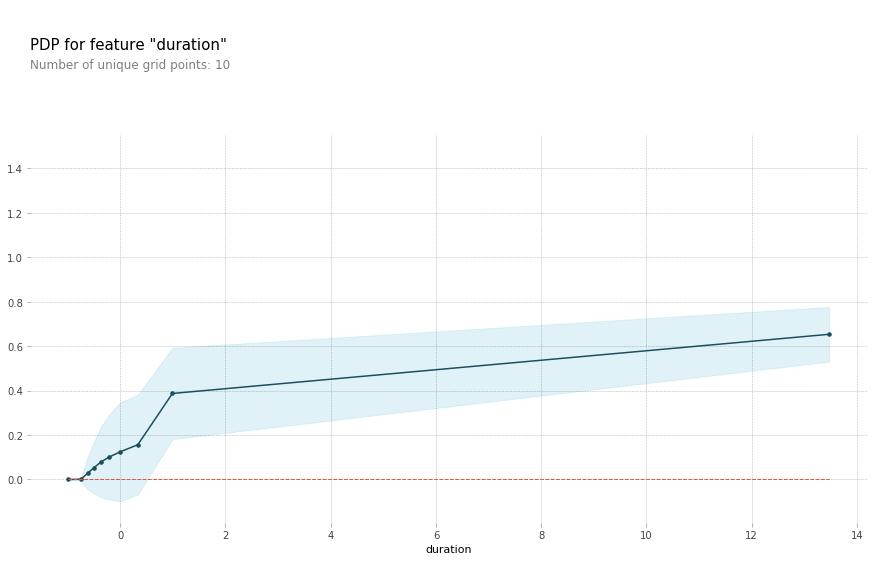

In [46]:
duration = pdp.pdp_isolate(model=clf_rf6, dataset=X_test, model_features=feature_names, feature='duration')

# plot it
pdp.pdp_plot(duration, 'duration')
plt.show()

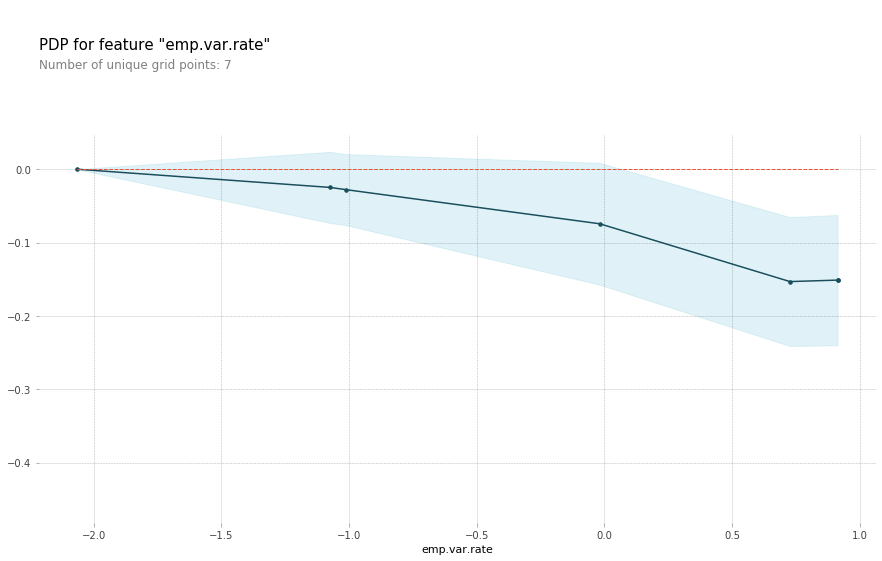

In [47]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
emp_var_rate = pdp.pdp_isolate(model=clf_rf6, dataset=X_test, model_features=feature_names, feature='emp.var.rate')

# plot it
pdp.pdp_plot(emp_var_rate, 'emp.var.rate')
plt.show()

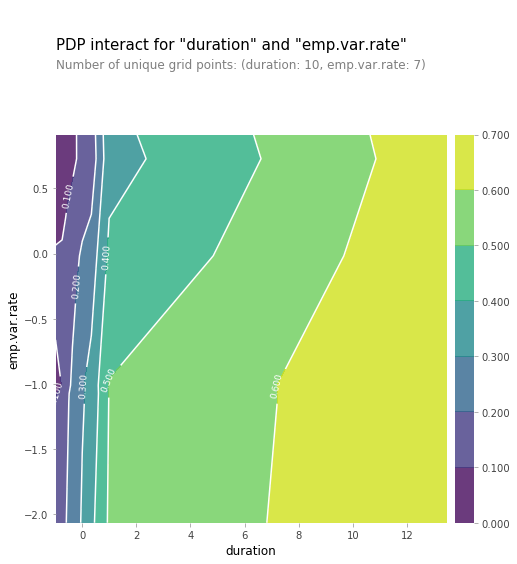

In [48]:
features_to_plot = ['duration', 'emp.var.rate']
inter1  =  pdp.pdp_interact(model=clf_rf6, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

In [50]:
## Shap Value